In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

# Define constants

In [3]:
%store -r F_1_TRAIN_INTERM
%store -r F_1_TRAIN_ENCODED
%store -r F_1_TEST_INTERM
%store -r F_1_TEST_ENCODED
%store -r DATA_INPUT_DIR
%store -r DATA_OUTPUT_DIR

# Read Train Data To Dataframe

In [4]:
df = pd.read_csv(f"{DATA_OUTPUT_DIR}/{F_1_TRAIN_ENCODED}", sep='|', index_col=0)
df_test = pd.read_csv(f"{DATA_OUTPUT_DIR}/{F_1_TEST_ENCODED}", sep='|', index_col=0)

In [5]:
df.shape

(80000, 21)

In [6]:
df.head()

,Quantity,UnitPrice,randint0,randint1,randint2,randint3,is_CustomerID_null,is_Description_null,InvoiceYear,Num_Words_Desc,...,dumm_StockCode_other,dumm_InvoiceDate_other,dumm_Country_EIRE,dumm_Country_France,dumm_Country_Germany,dumm_Country_United Kingdom,dumm_Country_other,dumm_CustomerID_filled_guest,dumm_CustomerID_filled_other,dumm_Description_filled_other
index,,,,,,,,,,,,,,,,,,,,,
75220,-10,0.00,2,2,105,1964,1,1,2011,1,...,1,1,0,0,0,1,0,1,0,1
48955,6,2.95,1,2,136,20035,0,0,2011,4,...,1,1,0,0,0,1,0,0,1,1
44966,18,1.25,2,5,140,45537,0,0,2011,4,...,1,1,0,0,0,1,0,0,1,1
13568,3,1.28,1,8,133,21122,1,0,2010,3,...,1,1,0,0,0,1,0,1,0,1
92727,1,5.79,1,1,106,84781,1,0,2011,6,...,1,1,0,0,0,1,0,1,0,1


In [7]:
df_test.head()

,Quantity,UnitPrice,randint0,randint1,randint2,randint3,is_CustomerID_null,is_Description_null,InvoiceYear,Num_Words_Desc,...,dumm_StockCode_other,dumm_InvoiceDate_other,dumm_Country_EIRE,dumm_Country_France,dumm_Country_Germany,dumm_Country_United Kingdom,dumm_Country_other,dumm_CustomerID_filled_guest,dumm_CustomerID_filled_other,dumm_Description_filled_other
index,,,,,,,,,,,,,,,,,,,,,
75721,1,1.25,1,6,121,36718,0,0,2011,7,...,1,1,0,0,0,1,0,0,1,1
80184,4,2.95,1,9,141,55893,0,0,2011,4,...,1,1,0,0,0,1,0,0,1,1
19864,2,2.95,1,9,106,94022,0,0,2010,5,...,1,1,0,0,0,1,0,0,1,1
76699,1,7.95,2,5,117,79599,0,0,2011,5,...,1,1,0,0,0,1,0,0,1,1
92991,12,1.25,1,7,122,69365,0,0,2011,7,...,1,1,0,0,0,1,0,0,1,1


In [8]:
target_col = 'randint0'
X_train = df.drop([target_col], axis=1)
y_train = df[target_col]
X_test = df_test.drop([target_col], axis=1)
y_test = df_test[target_col]

In [9]:
y_train=y_train.map(lambda v: v-1)
y_test=y_test.map(lambda v: v-1)

In [10]:
y_train

index
75220    1
48955    0
44966    1
13568    0
92727    0
        ..
6265     0
54886    1
76820    0
860      0
15795    1
Name: randint0, Length: 80000, dtype: int64

# Classification

In [11]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)

In [13]:
cv_scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5)

# Metrics

In [14]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

# Print the cross-validation scores and evaluation metrics
print("Cross-validation scores:", cv_scores)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Cross-validation scores: [0.4970625 0.5030625 0.4986875 0.5020625 0.4958125]
Accuracy: 0.5036
Precision: 0.5030836113638661
Recall: 0.49814796275903495
F1-score: 0.5006036217303823


In [15]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.5027
Precision: 0.5020989944352241
Recall: 0.5148663529882871
F1-score: 0.5084025306445236


# H2O AutoML

In [1]:
import h2o
from h2o.automl import H2OAutoML

In [12]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_292"; OpenJDK Runtime Environment (AdoptOpenJDK)(build 1.8.0_292-b10); OpenJDK 64-Bit Server VM (AdoptOpenJDK)(build 25.292-b10, mixed mode)
  Starting server from /opt/homebrew/anaconda3/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/nb/0qgg_5c93pz0gqk79bc2kb680000gn/T/tmp4gdtmvul
  JVM stdout: /var/folders/nb/0qgg_5c93pz0gqk79bc2kb680000gn/T/tmp4gdtmvul/h2o_issamelalaoui_started_from_python.out
  JVM stderr: /var/folders/nb/0qgg_5c93pz0gqk79bc2kb680000gn/T/tmp4gdtmvul/h2o_issamelalaoui_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Africa/Casablanca
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 21 days
H2O_cluster_name:,H2O_from_python_issamelalaoui_o1p55z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.541 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


In [16]:
absolute_path = "/Users/issamelalaoui/git/datascience-cookiecutter-notebook"

In [49]:
train = h2o.H2OFrame(df)
test = h2o.H2OFrame(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [53]:
# Identify predictors and response
x = train.columns
y = target_col
x.remove(y)

In [54]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models
aml = H2OAutoML(max_models=5, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |
12:10:54.421: _train param, Dropping bad and constant columns: [dumm_InvoiceDate_other, dumm_InvoiceNo_other, dumm_StockCode_other, dumm_Description_filled_other]

██
12:11:14.422: _train param, Dropping bad and constant columns: [dumm_InvoiceDate_other, dumm_InvoiceNo_other, dumm_StockCode_other, dumm_Description_filled_other]


12:11:18.594: _train param, Dropping bad and constant columns: [dumm_InvoiceDate_other, dumm_InvoiceNo_other, dumm_StockCode_other, dumm_Description_filled_other]

██
12:11:24.605: _train param, Dropping bad and constant columns: [dumm_InvoiceDate_other, dumm_InvoiceNo_other, dumm_StockCode_other, dumm_Description_filled_other]

█
12:11:38.613: _train param, Dropping bad and constant columns: [dumm_InvoiceDate_other, dumm_InvoiceNo_other, dumm_StockCode_other, dumm_Description_filled_other]

███
12:11:58.956: _train param, Dropping unused columns: [dumm_InvoiceDate_other, dumm_InvoiceNo_other, dumm_StockCode_other, dumm_Description_filled_ot

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DRF_1_AutoML_2_20230619_121054,0.502798,0.701229,0.502845,0.5,0.503873,0.253888
GBM_1_AutoML_2_20230619_121054,0.501723,0.69531,0.501342,0.5,0.501072,0.251073
XGBoost_1_AutoML_2_20230619_121054,0.498606,0.723041,0.499484,0.499988,0.513538,0.263721
GLM_1_AutoML_2_20230619_121054,0.498358,0.693189,0.499024,0.5,0.500019,0.250019
StackedEnsemble_AllModels_1_AutoML_2_20230619_121054,0.497329,0.693157,0.497281,0.5,0.500005,0.250005
XGBoost_2_AutoML_2_20230619_121054,0.496706,0.711861,0.498204,0.5,0.508646,0.258721
StackedEnsemble_BestOfFamily_1_AutoML_2_20230619_121054,0.496038,0.693159,0.49708,0.499988,0.500006,0.250006


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_1_AutoML_2_20230619_121054,0.503884,0.694781,0.504281,0.49995,0.500811,0.250811,727,0.006541,GBM
DRF_1_AutoML_2_20230619_121054,0.503192,0.698793,0.505133,0.5,0.502736,0.252743,2103,0.015723,DRF
GLM_1_AutoML_2_20230619_121054,0.502716,0.693127,0.501389,0.49995,0.49999,0.24999,188,0.002295,GLM
XGBoost_1_AutoML_2_20230619_121054,0.501528,0.722306,0.502874,0.5,0.513189,0.263363,4212,0.006785,XGBoost
XGBoost_2_AutoML_2_20230619_121054,0.501446,0.705063,0.499855,0.499701,0.505571,0.255602,2880,0.003585,XGBoost
StackedEnsemble_AllModels_1_AutoML_2_20230619_121054,0.5,0.693147,0.49945,0.5,0.5,0.25,2532,0.001738,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20230619_121054,0.5,0.693147,0.49945,0.5,0.5,0.25,2198,0.001927,StackedEnsemble


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_1_AutoML_2_20230619_121054

,1,2,Error,Rate
1,0.0,10011.0,1.0,(10011.0/10011.0)
2,0.0,9989.0,0.0,(0.0/9989.0)
Total,0.0,20000.0,0.5006,(10011.0/20000.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

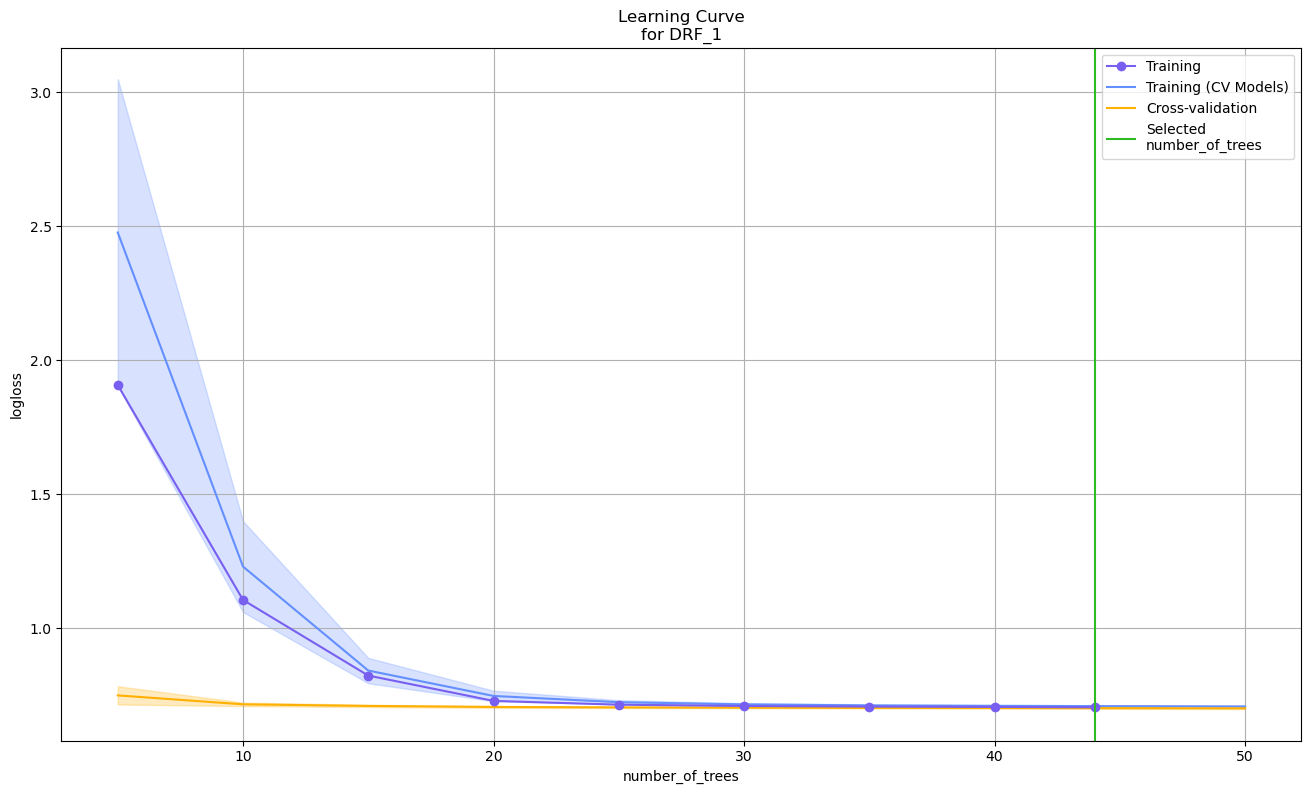

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

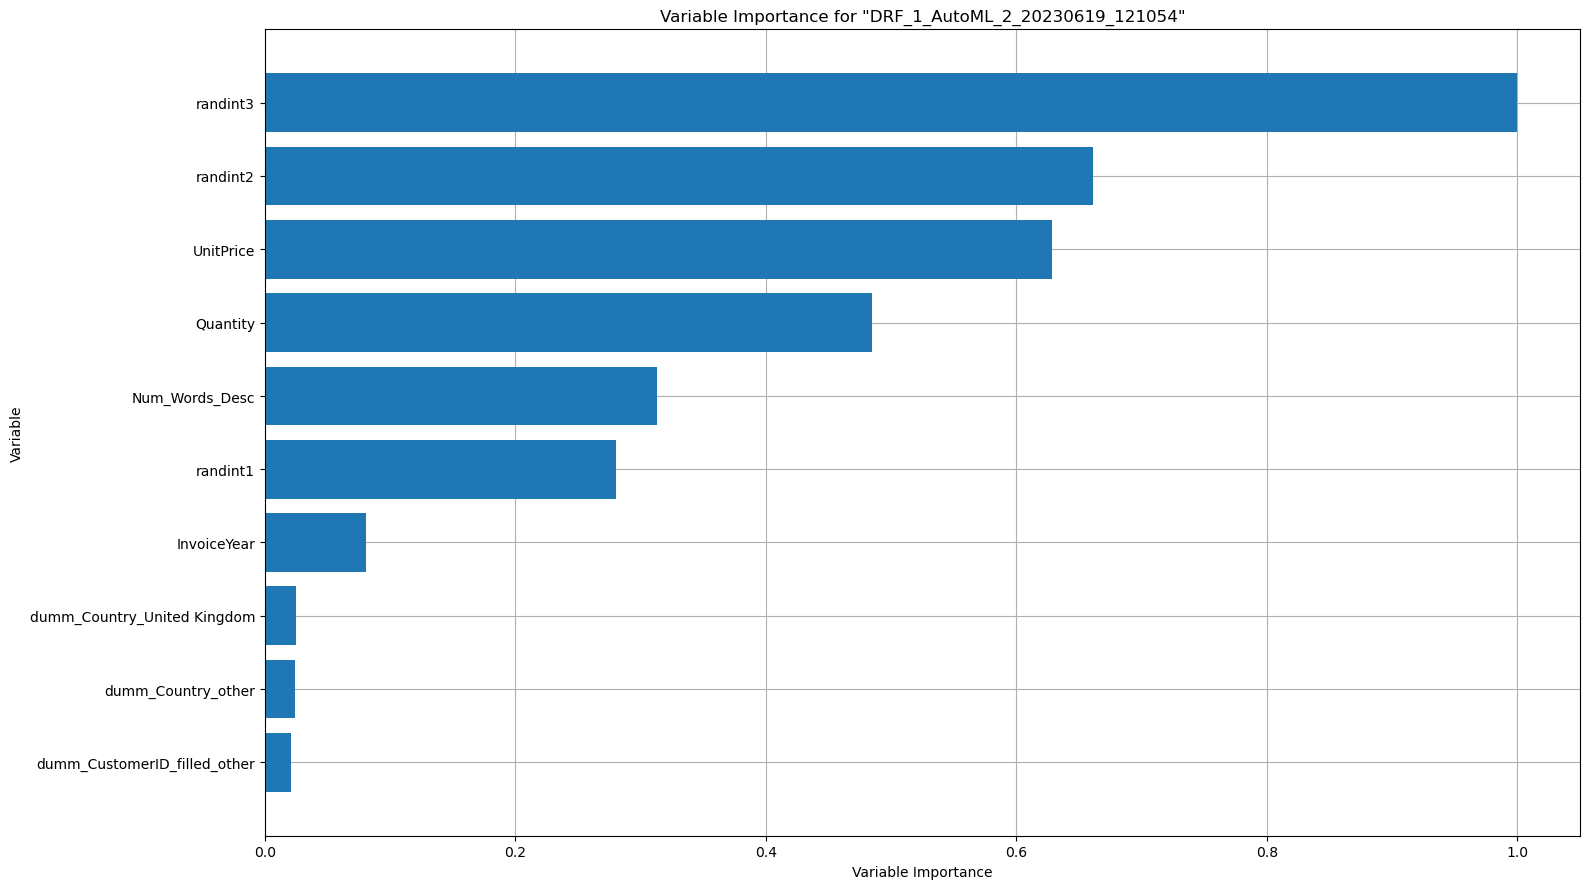

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

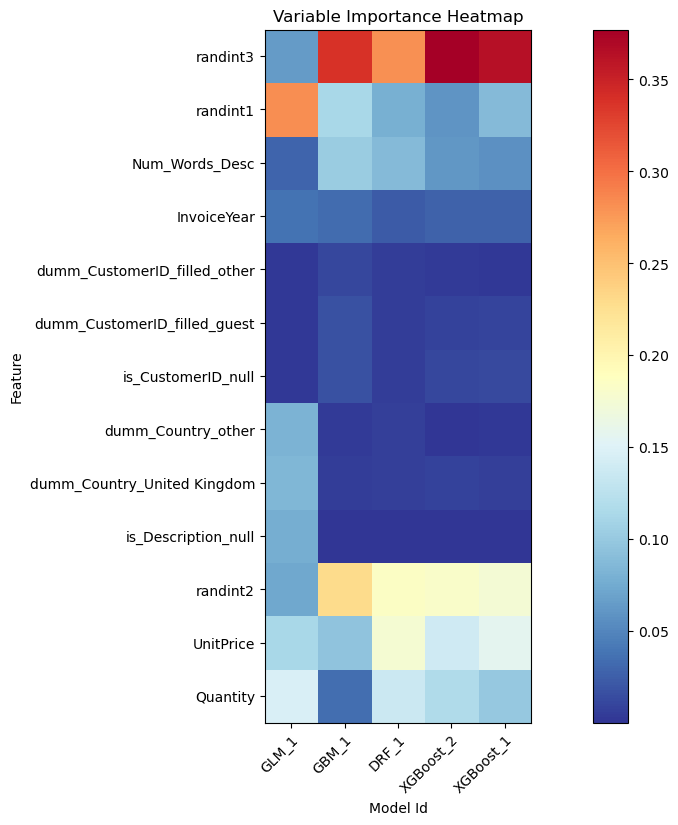

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

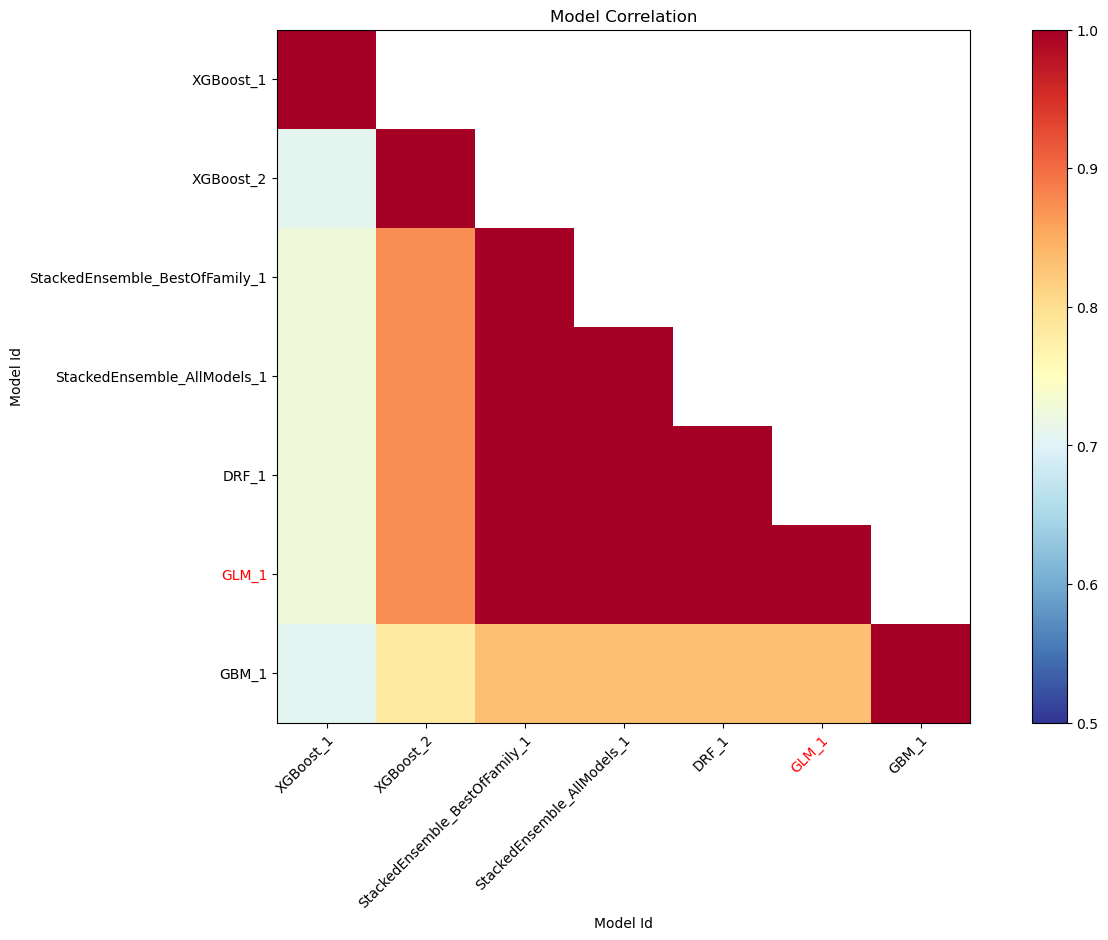

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

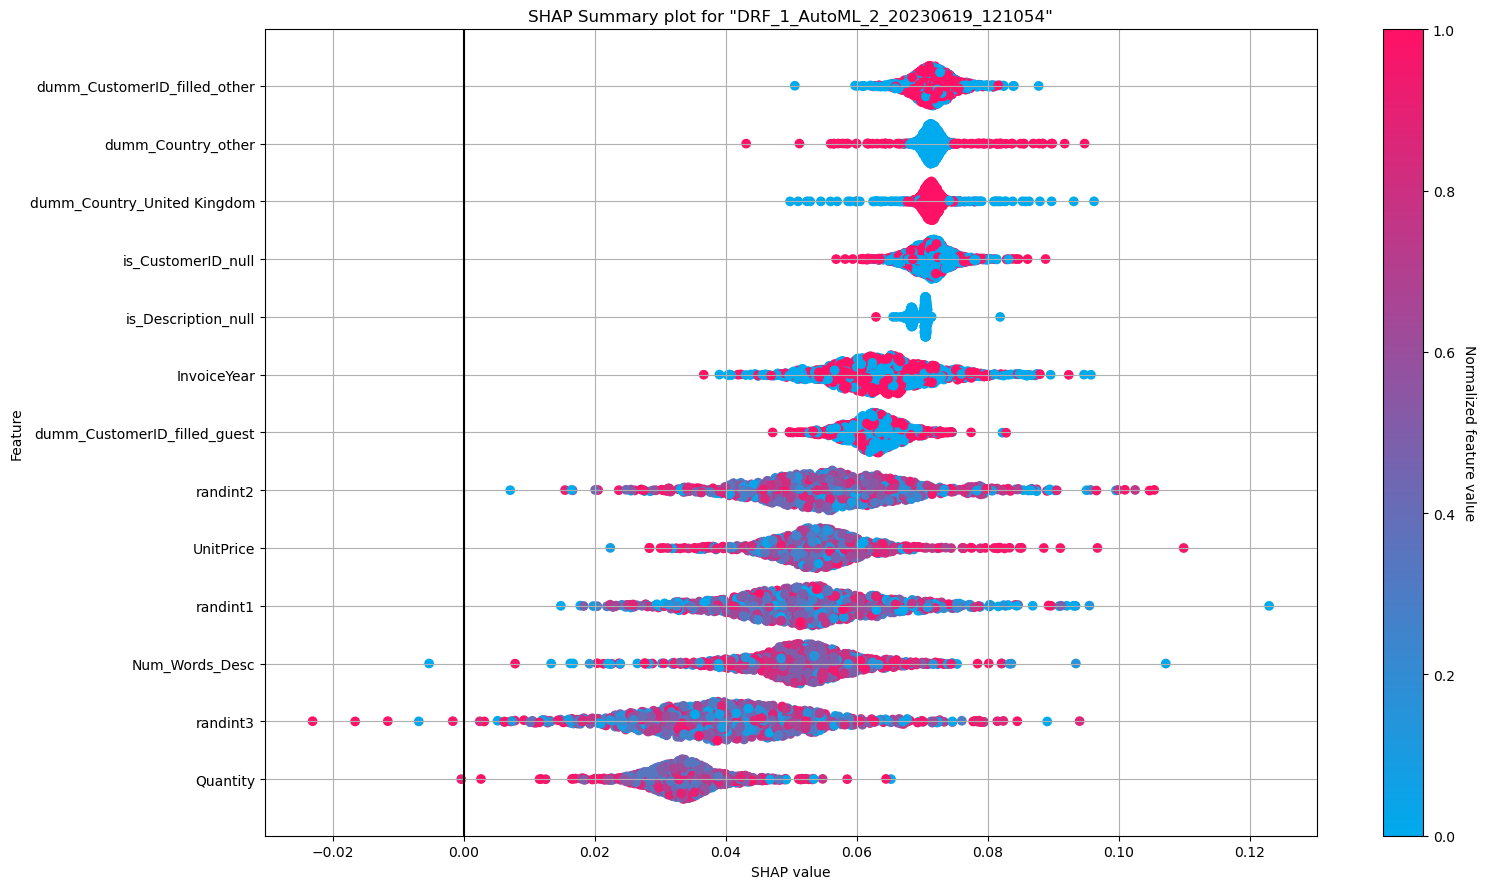

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

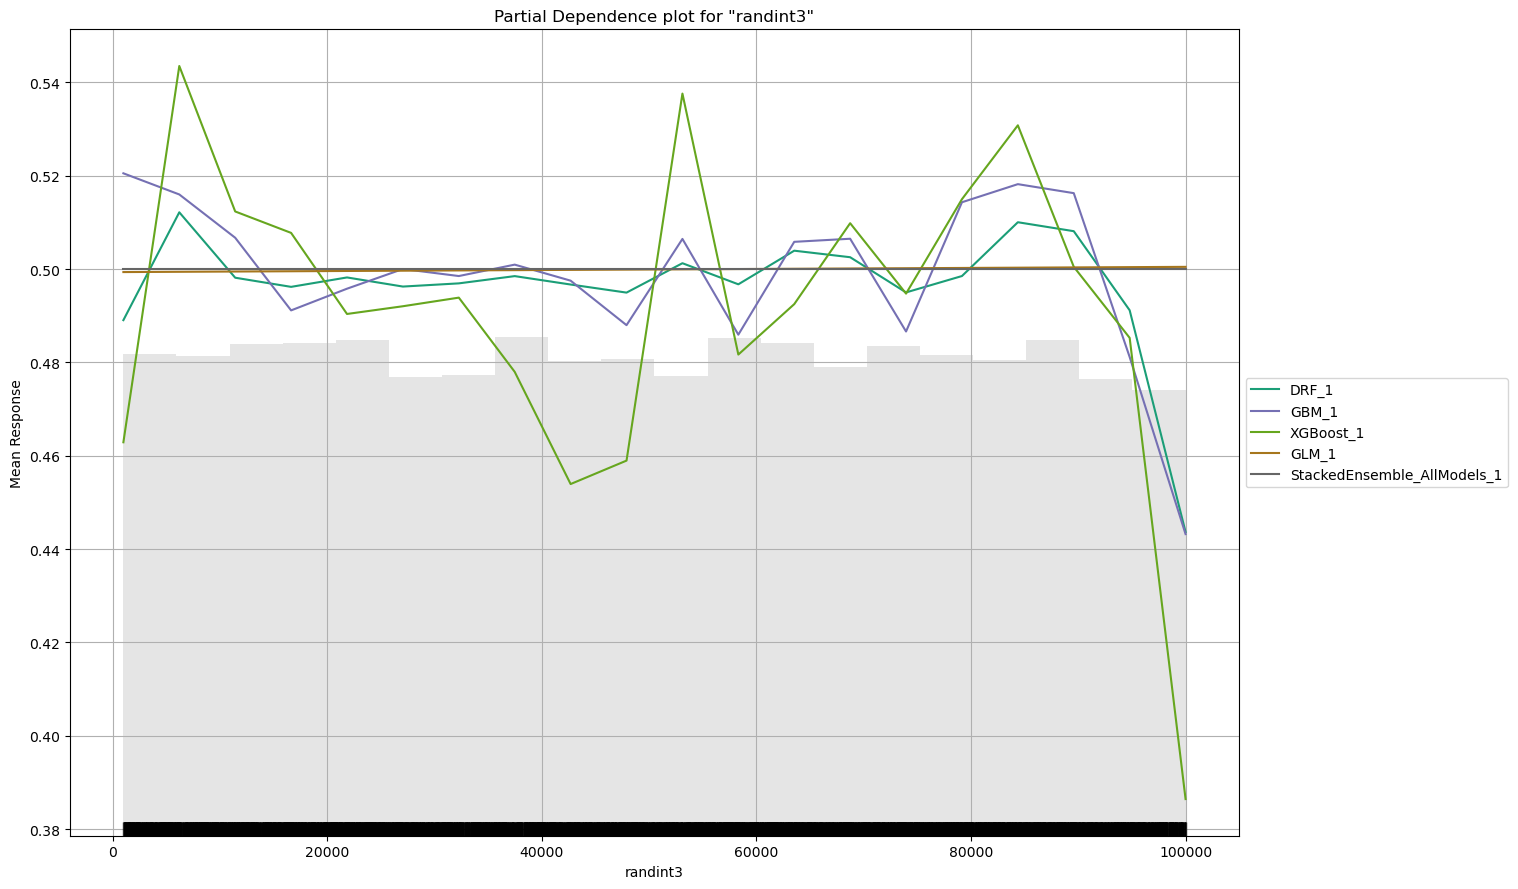

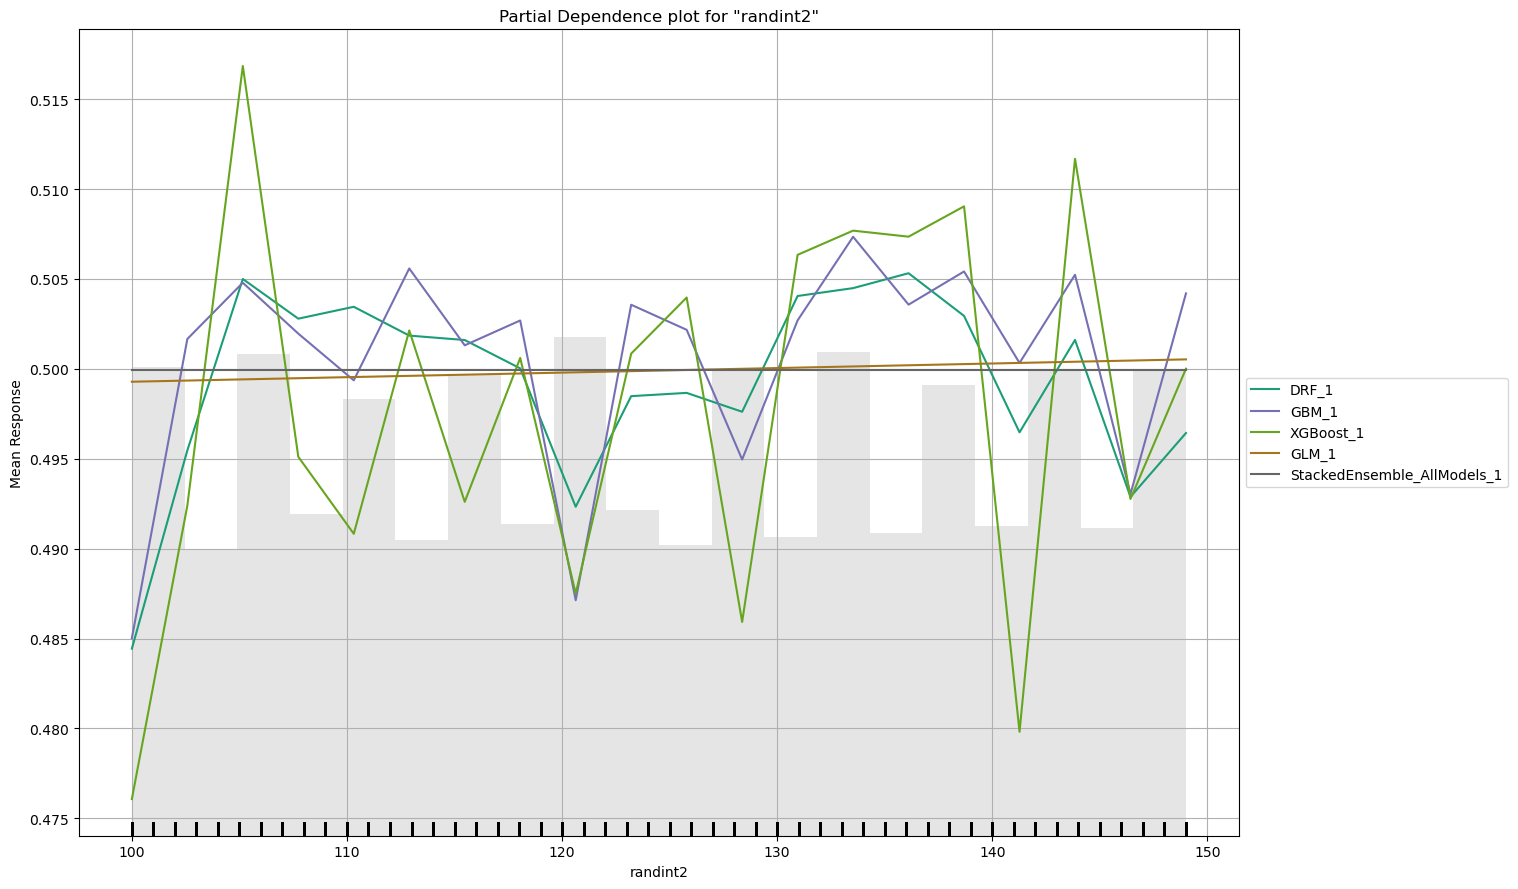

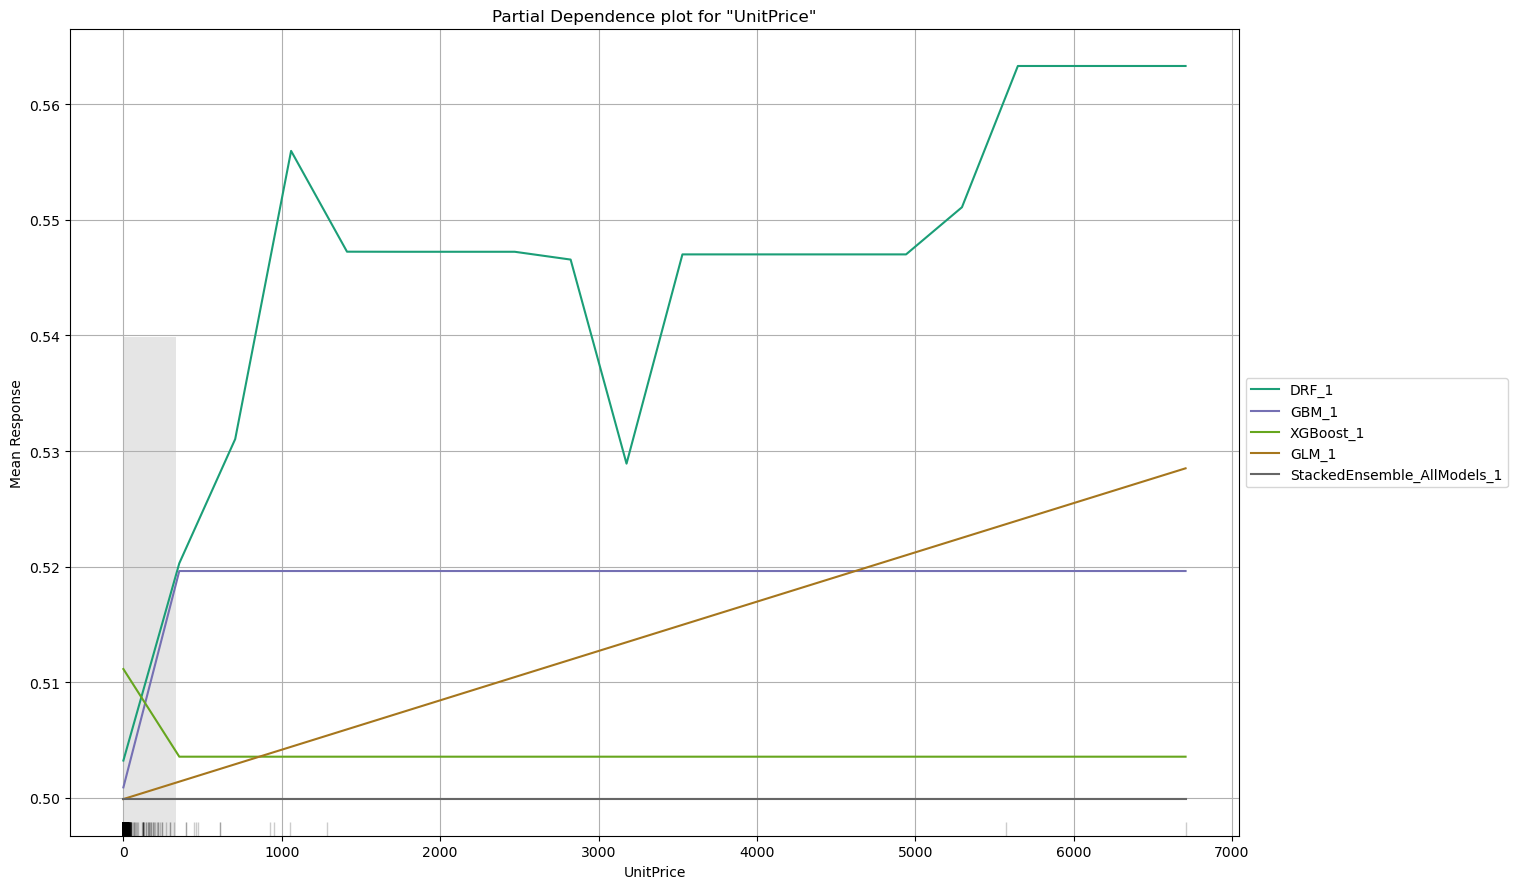

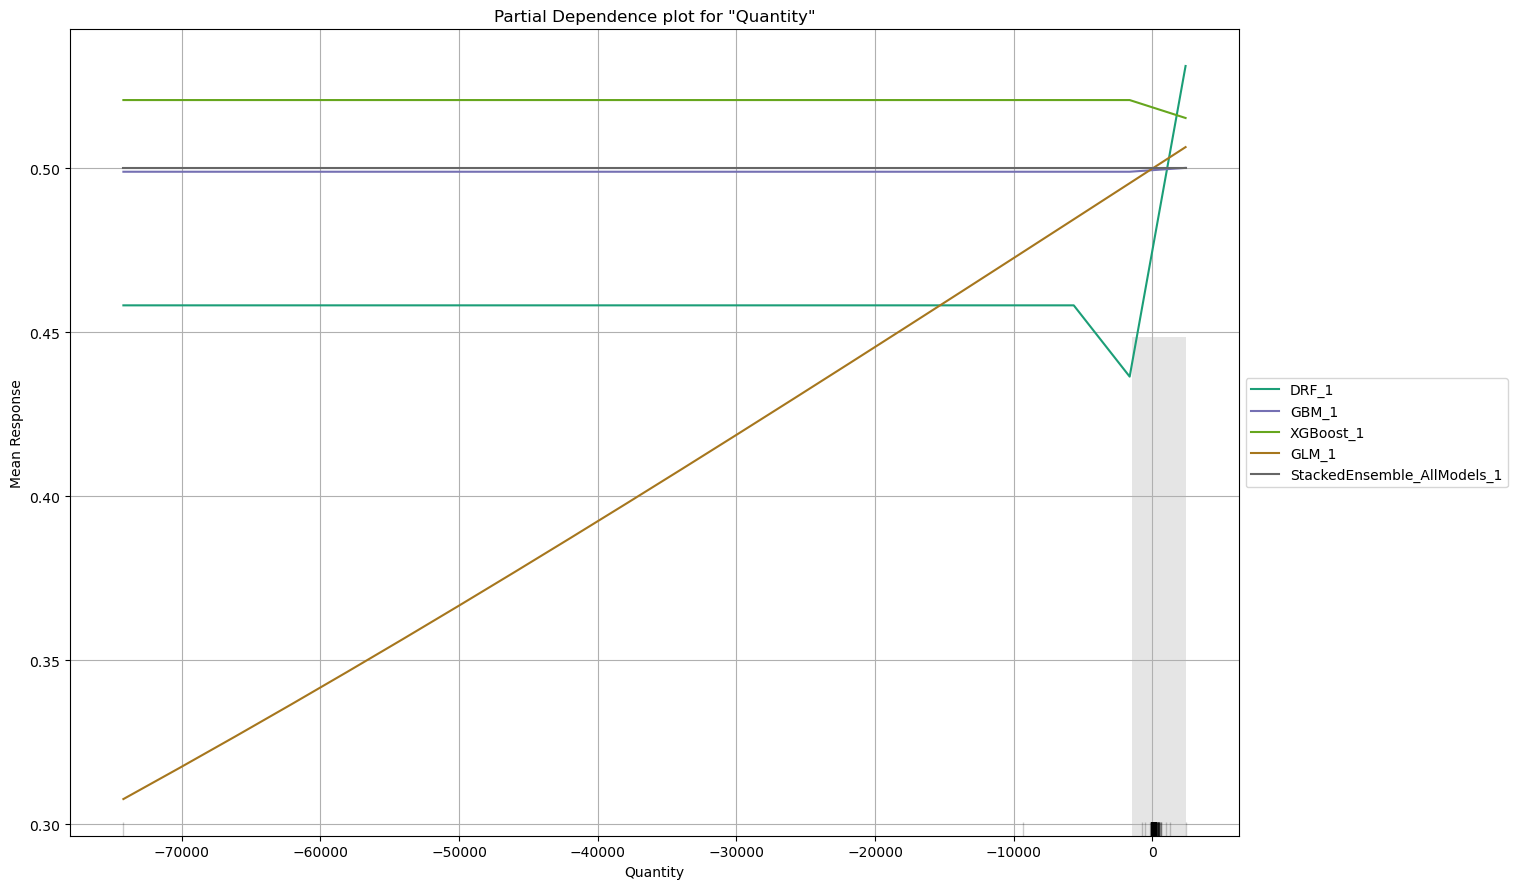

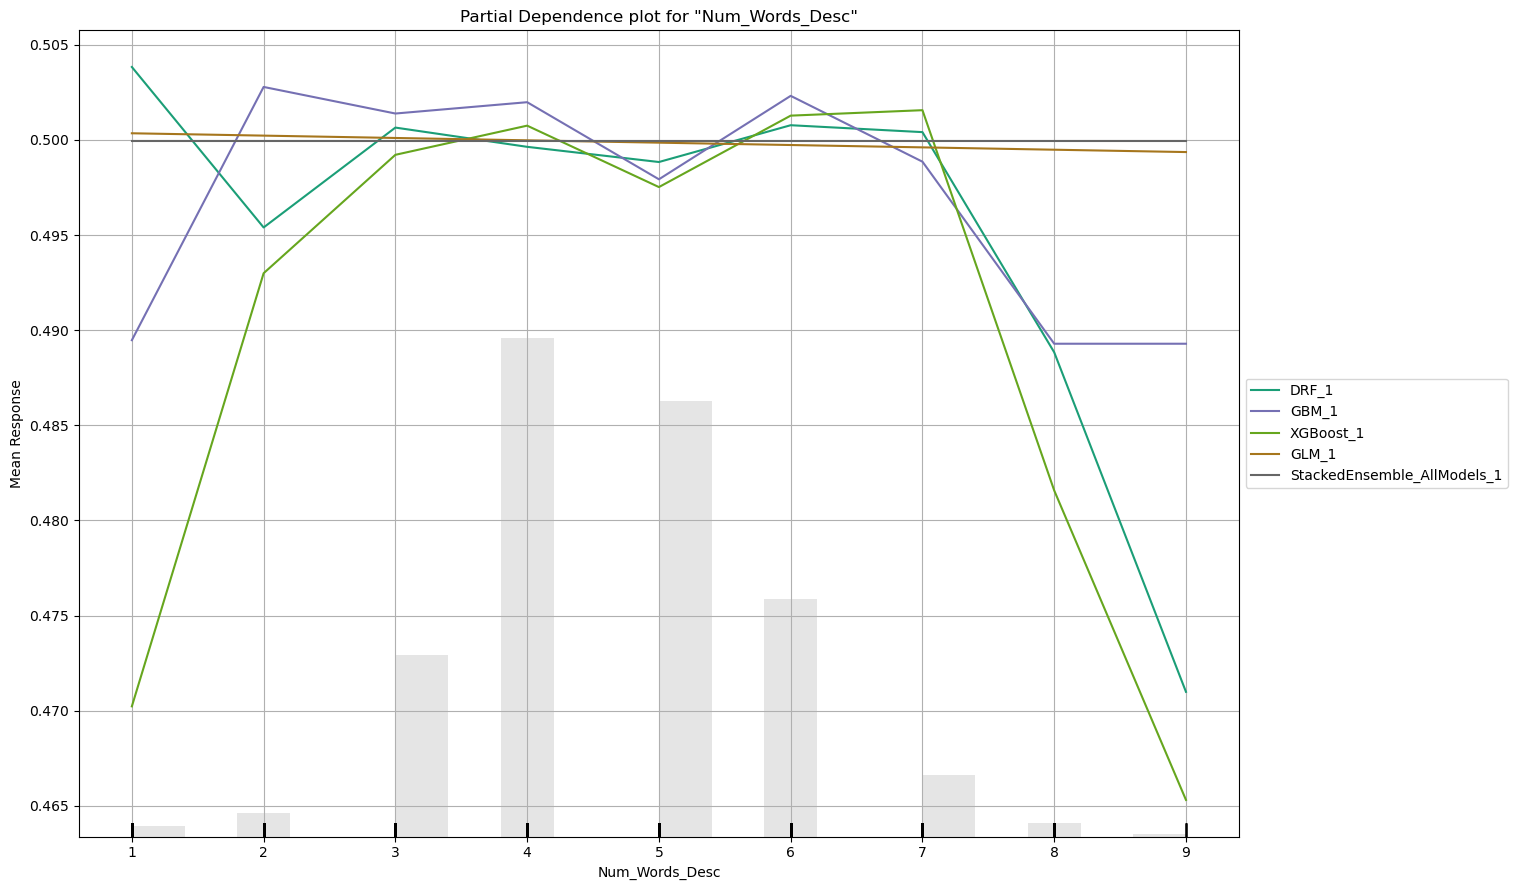

In [55]:
exa = aml.explain(test)